# Project Olympic Games
Group Sweden

Felix Tjernberg, Erik Larsson 



In [4]:
# Imports
import pandas as pd
import hashlib
from dash_source.components.landing.load_landing_data import swedish_medal_counts
from dash_source.utilities.plots  import swedish_medals_barplot
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the raw data
athlete_events = pd.read_csv("raw-data/athlete_events.csv")

athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


## Task 0 - Geting started

### a) Number of countries

In [5]:
country_codes = athlete_events["NOC"].unique()
print(f"There is {len(country_codes)} countries in the data set.")

There is 230 countries in the data set.


### b) Which countries


In [6]:
print(f"The following NOC's are in the data set: \n{country_codes}" )

The following NOC's are in the data set: 
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'F

### c) Which sports

In [7]:
print( f"The following sports are in the data: \n{athlete_events['Sport'].unique()}  \n\nNote that every sport can have many branches.")

The following sports are in the data: 
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']  

Note that every sport can have many branches.


### d) What type of medals


In [8]:
print( f"The typ of medals in the data :{athlete_events['Medal'].unique()}. \nnan of course corresponding to not getting any medal")

The typ of medals in the data :[nan 'Gold' 'Bronze' 'Silver']. 
nan of course corresponding to not getting any medal


### e) Statistics for age

In [10]:
print(f"Statistics for age: \n{athlete_events['Age'].describe()}")

Statistics for age: 
count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


### f) Games since 1896



In [11]:

games = athlete_events["Games"].sort_values().unique()
print(f"All games in the data set: \n{games}")

All games in the data set: 
['1896 Summer' '1900 Summer' '1904 Summer' '1906 Summer' '1908 Summer'
 '1912 Summer' '1920 Summer' '1924 Summer' '1924 Winter' '1928 Summer'
 '1928 Winter' '1932 Summer' '1932 Winter' '1936 Summer' '1936 Winter'
 '1948 Summer' '1948 Winter' '1952 Summer' '1952 Winter' '1956 Summer'
 '1956 Winter' '1960 Summer' '1960 Winter' '1964 Summer' '1964 Winter'
 '1968 Summer' '1968 Winter' '1972 Summer' '1972 Winter' '1976 Summer'
 '1976 Winter' '1980 Summer' '1980 Winter' '1984 Summer' '1984 Winter'
 '1988 Summer' '1988 Winter' '1992 Summer' '1992 Winter' '1994 Winter'
 '1996 Summer' '1998 Winter' '2000 Summer' '2002 Winter' '2004 Summer'
 '2006 Winter' '2008 Summer' '2010 Winter' '2012 Summer' '2014 Winter'
 '2016 Summer']


In [12]:
year_list = athlete_events["Year"].sort_values().unique()
print(f"All the years with an Olympic Game: {year_list}")

All the years with an Olympic Game: [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]


In [13]:
print(f"Number of games in the data set: {len(games)}")


Number of games in the data set: 51


### g) Pie chart of gender distribution

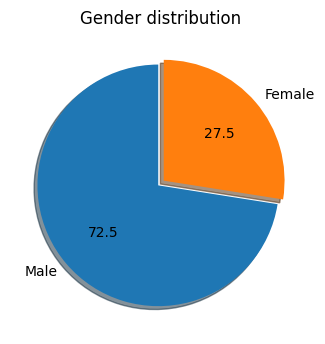

In [15]:
 sex_count = (athlete_events[athlete_events["Sex"] == 'M']["Sex"].count(), athlete_events[athlete_events["Sex"] == 'F']["Sex"].count())

fig, ax = plt.figure(dpi=100, facecolor="white"), plt.axes()

ax.pie (sex_count, labels=("Male", "Female"), explode=(0.03, 0.03), startangle=90, frame= False, shadow=True, autopct= "%.1f")
ax.set_title("Gender distribution");


### h) Top ten medal winning countries 

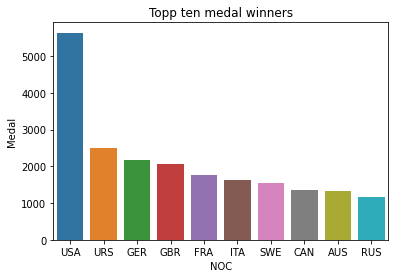

In [17]:
top10_countries = athlete_events[athlete_events["Medal"].notna()].groupby("NOC").count().sort_values("Medal", ascending=False).head(10)

sns.barplot(data=top10_countries, x=top10_countries.index , y=top10_countries["Medal"]).set_title("Topp ten medal winners");


### i) Swedish medals per sport



In [22]:
swe_medals_count = athlete_events[athlete_events["NOC"] == "SWE"].dropna(inplace=False).groupby("Sport").size()

print(f"Swedish medals per sport: \n{swe_medals_count}")

Swedish medals per sport: 
Sport
Alpine Skiing            15
Archery                   2
Athletics               110
Biathlon                 15
Boxing                    3
Canoeing                 45
Cross Country Skiing     89
Curling                  19
Cycling                  17
Diving                    5
Equestrianism            14
Fencing                  10
Football                 19
Freestyle Skiing          2
Golf                      1
Gymnastics                4
Handball                 61
Ice Hockey              189
Modern Pentathlon         6
Sailing                  33
Shooting                 14
Snowboarding              1
Speed Skating             9
Swimming                 42
Table Tennis              3
Tennis                    5
Triathlon                 1
Tug-Of-War                1
Weightlifting             1
Wrestling                29
dtype: int64


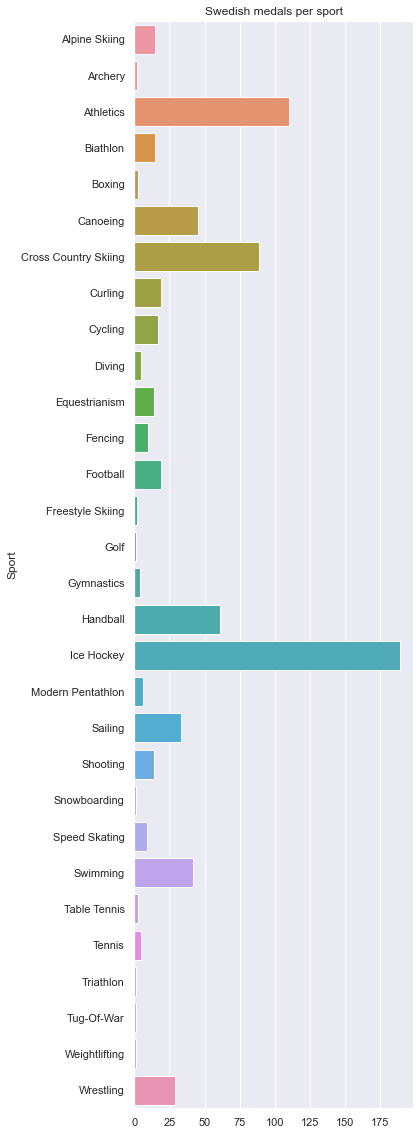

In [24]:
sns.set(rc={"figure.figsize":(5, 20)})
sns.barplot(x=swe_medals_count.values, y=swe_medals_count.index, ).set_title("Swedish medals per sport");

## Task 1 - Swedish statistics
### Swedish data

In [29]:
swedish_athletes = athlete_events[athlete_events["NOC"] == "SWE"]

### a) Anonymizing data

In [30]:
hashed_swedish_names = swedish_athletes['Name'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())
swedish_athletes.insert(1, 'Hashed_names', hashed_swedish_names)
swedish_athletes.drop(columns='Name', inplace=True)
swedish_athletes.head()

C:\Users\ErikLarsson-AIU21GBG\.virtualenvs\Databehandling-OS-projekt-Felix-Tjernberg--OEW8q_Bs\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Hashed_names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
725,414,29a708e9c2f5e49e3299680bdc89c707c8c258a226a4dc...,M,26.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Hammer Throw,NaN
726,415,d712af0c4440a3d677c7b9d6a0fe816d08c40b51f5a00b...,M,23.0,181.0,76.0,Sweden,SWE,1992 Winter,1992,Winter,Albertville,Freestyle Skiing,Freestyle Skiing Men's Moguls,NaN
727,416,a9d3f60fd1cd7e878f36d0bf1c82aea4b071cce2a43f04...,M,19.0,181.0,78.0,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Long Jump,Bronze
728,416,a9d3f60fd1cd7e878f36d0bf1c82aea4b071cce2a43f04...,M,19.0,181.0,78.0,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Triple Jump,Silver
729,417,9f1fe5f1cec1ce1cbb1265d84c10c686566e35efa7b36b...,F,17.0,190.0,73.0,Sweden,SWE,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 50 metres Freestyle,NaN


### b) Sports with most medals

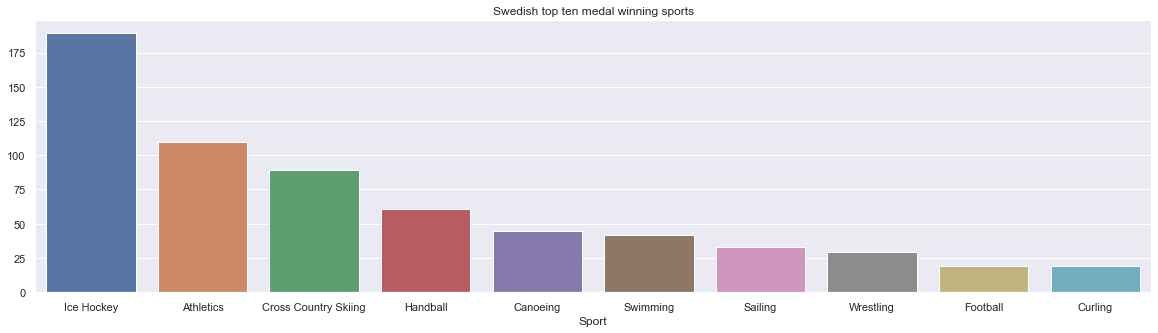

In [25]:
top_10_swedish_sports = swe_medals_count.sort_values(ascending=False).head(10)

sns.set(rc={"figure.figsize":(20, 5)})
sns.barplot(y=top_10_swedish_sports.values, x=top_10_swedish_sports.index, ).set_title("Swedish top ten medal winning sports");

### c) Number of medals per game

In [ ]:
s_m_c = swedish_medal_counts(swedish_athletes)
s_m_c

,ID,Hashed_names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
260512,130370,a63104464f148df5e1a5bf709ce80e02c872bc73070902...,M,28.0,178.0,NaN,Sweden,SWE,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,Silver
64221,32895,b043fb8173a04ff85ace003f509cac191b8760c6035946...,M,26.0,NaN,NaN,Sweden,SWE,1948 Winter,1948,Winter,Sankt Moritz,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,Silver
176688,88847,1212b1f56f10386c2b29208373b423f7e12bfb21e344b9...,F,32.0,159.0,55.0,Sweden,SWE,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 7.5 kilometres Sprint,Silver
48236,24860,4226d9457a21a197bf189c835a09052fc777e4faa901b3...,M,46.0,185.0,95.0,Sweden,SWE,2012 Summer,2012,Summer,London,Shooting,Shooting Men's Double Trap,Silver
51236,26341,ba9b3a59b2d08a571c394a8401a27da5fbab3ec5fdd5f2...,M,31.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Modern Pentathlon,Modern Pentathlon Men's Individual,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171915,86383,dc16928b72302057280b407fa14560a0482dbe2e56a086...,M,28.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Wrestling,"Wrestling Men's Heavyweight, Freestyle",Bronze
62125,31810,a7a2ffb9a48dd68775bbbb4359f301795d527a515200b4...,M,31.0,NaN,NaN,Sweden,SWE,1924 Summer,1924,Summer,Paris,Shooting,"Shooting Men's Running Target, Double Shot, Team",Bronze
61426,31461,5e5f1268accd529511ce464b5fffc4649bbf758bbeab31...,F,25.0,NaN,NaN,Sweden,SWE,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Women's 3 x 5 kilometres ...,Bronze
61425,31461,5e5f1268accd529511ce464b5fffc4649bbf758bbeab31...,F,25.0,NaN,NaN,Sweden,SWE,1956 Winter,1956,Winter,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,Bronze


In [ ]:
# Chose year
year = 1912

swedish_medals_barplot(s_m_c, year)

### d) Age histogram


Text(0.5, 1.0, 'Age histogram')

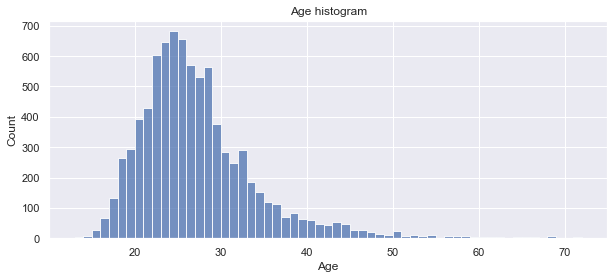

In [43]:
sns.set(rc={"figure.figsize":(10, 4)})
sns.histplot(swedish_athletes, x='Age', binwidth=1, binrange=(13, 72)).set_title('Age histogram')

### e) Youngest and oldest

In [42]:
print(f"Youngest competitor was {swedish_athletes['Age'].min():.0f} year old. \nOldest competitor was {swedish_athletes['Age'].max():.0f} year old.")

Youngest medal winner was 13 year old. 
Oldest medal winner was 72 year old.


In [57]:
# Youngest competitors
swedish_athletes.sort_values('Age', ascending=True).head(10)

,ID,Hashed_names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
222373,111715,78dcdf1157373977d3a475e0e6916915960188c807ec4e...,M,13.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Men's Plain High,Silver
35634,18328,b443cf57d91db3172beebed56bccd1b3b66bdaef6cadac...,F,13.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN
35633,18328,b443cf57d91db3172beebed56bccd1b3b66bdaef6cadac...,F,13.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN
221941,111543,f4b16072858a1425fe889046104c4d42d09660f3640a29...,F,14.0,182.0,76.0,Sweden,SWE,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN
221939,111543,f4b16072858a1425fe889046104c4d42d09660f3640a29...,F,14.0,182.0,76.0,Sweden,SWE,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 100 metres Backstroke,NaN
176926,88956,081b461e6ee4f958bb41adb4da0c4686c31e301bd24809...,F,14.0,171.0,59.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN
7064,3953,e6ba30f9dc39c5fb30daea8f7c4d768dd6a809ab7549b0...,F,14.0,167.0,53.0,Sweden,SWE,1964 Summer,1964,Summer,Tokyo,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN
176924,88956,081b461e6ee4f958bb41adb4da0c4686c31e301bd24809...,F,14.0,171.0,59.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN
221940,111543,f4b16072858a1425fe889046104c4d42d09660f3640a29...,F,14.0,182.0,76.0,Sweden,SWE,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 100 metres Butterfly,NaN
176925,88956,081b461e6ee4f958bb41adb4da0c4686c31e301bd24809...,F,14.0,171.0,59.0,Sweden,SWE,1972 Summer,1972,Summer,Munich,Swimming,Swimming Women's 100 metres Backstroke,NaN


In [54]:
print(f"The youngest medal winner {athlete_events[(athlete_events['ID'] == 18328)]['Name'].unique()[0]}.")

The youngest medal winner Greta Ingeborg Carlsson (-Nygren).


In [ ]:
# Oldest competitors
swedish_athletes.sort_values('Age', ascending=False).head(10)

,ID,Hashed_names,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
139075,69867,293908b78df5bf2c6a16a3ffa975895c0bcfb40594ed06...,M,72.0,NaN,NaN,Sweden,SWE,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
233394,117046,fc37dfab6634efbbc2fc0f8d1e247d0c6c4135b4199424...,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot, Team",NaN
233395,117046,fc37dfab6634efbbc2fc0f8d1e247d0c6c4135b4199424...,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver
233393,117046,fc37dfab6634efbbc2fc0f8d1e247d0c6c4135b4199424...,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot",NaN
2392,1337,b9cb33f1af99da5c7e9a77ef3be518c6b80c7065a289c2...,M,71.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
214490,107675,960dada9fa6d5683d2d6fe7ab9e9fdb52584e473d7deed...,M,69.0,NaN,NaN,Sweden,SWE,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
214491,107675,960dada9fa6d5683d2d6fe7ab9e9fdb52584e473d7deed...,M,69.0,NaN,NaN,Sweden,SWE,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
21364,11270,746d55faf4ee152ed70f9d83f49d157aa05883dff99e52...,F,68.0,NaN,NaN,Sweden,SWE,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
21363,11270,746d55faf4ee152ed70f9d83f49d157aa05883dff99e52...,F,68.0,NaN,NaN,Sweden,SWE,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
21362,11270,746d55faf4ee152ed70f9d83f49d157aa05883dff99e52...,F,68.0,NaN,NaN,Sweden,SWE,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN


In [53]:
print(f"The oldest medal winner {athlete_events[(athlete_events['ID'] == 117046)]['Name'].unique()[0]}.")

The oldest medal winner Oscar Gomer Swahn.


### f) Some other EDA

In [60]:
print(f"The weights of the swedish athlets: \n{swedish_athletes['Weight'].unique()}")

The weights of the swedish athlets: 
[  nan  76.   78.   73.   60.   84.   77.   61.   72.   81.   68.   65.
  52.   56.   38.   74.   67.   75.   90.   80.   69.   64.   63.   59.
  70.   85.   86.   62.   98.   55.   87.   83.   92.   50.   88.   57.
 130.   63.5  89.   79.  105.  115.   93.  106.   99.   66.   51.  114.
  82.   71.   58.   49.   53.   95.  100.  103.  122.  102.   91.   96.
 127.5  46.  107.  140.  120.   97.   94.  118.   54.  104.   47.  135.
 108.  113.  126.   73.5  68.5  40.  109.  125.  123.  110.  101.  155.
  48.   45. ]


In [62]:
swedish_best_years = swedish_athletes[
    (swedish_athletes['Games'] == '1912 Summer') | (swedish_athletes['Games'] == '1912 Summer')]
        
swedish_best_years['Event'].unique()

array(["Athletics Men's Hammer Throw", "Athletics Men's Long Jump",
       "Athletics Men's Triple Jump", "Athletics Men's Javelin Throw",
       "Athletics Men's Javelin Throw, Both Hands",
       "Equestrianism Men's Jumping, Individual",
       "Equestrianism Men's Three-Day Event, Individual",
       "Equestrianism Men's Three-Day Event, Team",
       "Diving Men's Platform", "Diving Men's Plain High",
       "Diving Women's Plain High",
       "Equestrianism Men's Dressage, Individual",
       "Athletics Men's High Jump", "Rowing Men's Coxed Eights",
       "Athletics Men's Marathon",
       "Wrestling Men's Middleweight B, Greco-Roman",
       "Wrestling Men's Featherweight, Greco-Roman",
       "Tug-Of-War Men's Tug-Of-War",
       "Swimming Men's 100 metres Freestyle",
       "Athletics Men's Cross-Country, Individual",
       "Athletics Men's Cross-Country, Team",
       "Wrestling Men's Middleweight A, Greco-Roman",
       "Swimming Men's 200 metres Breaststroke",
       "Swi